# Predicting heart disease using ML

Building a real-world machine learning model capable of predicting whether or not someone has heart disease based on medical attributes.

The approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



## 1.Problem Definition 
Given parameters, can we predict whether or not they have heart disease?

## 2.Data
Data set is obtained from kaggle:
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset?resource=download

## 3.Evaluation
If we can reach 95% accuracy whether or not patient as heart disease during the proof of concept, we'll pursue the project 

## 4.Features 
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

In [3]:
import sklearn
sklearn.__version__
sns.__version__

'0.13.2'

# Preparing the tools 
Importing all the libraries 


In [1]:
# Regular EDA(exploratory data analysis ) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to the plot inside the cell
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [2]:
df=pd.read_csv("heart disease classification dataset.csv")
df.shape
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes



# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df=df.drop("Unnamed: 0",axis=1)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [5]:
df["target"].value_counts()
# how many yes and no are there in the data

target
yes    165
no     138
Name: count, dtype: int64

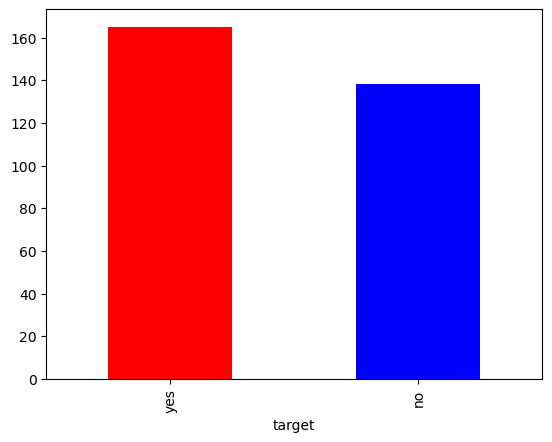

In [6]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [9]:
df.dtypes

age           int64
sex          object
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target       object
dtype: object

In [10]:
#compare sex column to target

pd.crosstab(df.target,df.sex)

sex,female,male
target,,
no,24,114
yes,72,93


**Converting categorical data into numerical**

The "sex" and "target" are in object data type so we converted them into numerical (binary) using **Label Encoder**.

**Note:** That while this approach is fine for binary categorical variables like "male" and "female", it's generally not suitable for categorical variables with more than two categories. In such cases, one-hot encoding (OneHotEncoder) is preferred to avoid ordinal assumptions.

In [11]:
from sklearn.preprocessing import LabelEncoder

Label_encoder=LabelEncoder()

df["Sex"]=Label_encoder.fit_transform(df["sex"])

df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes,1
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes,0
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes,1
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes,0


In [12]:
df=df.drop("sex",axis=1)
#df.head()

In [13]:
df["Target"]=Label_encoder.fit_transform(df["target"])
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex,Target
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes,0,1
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes,1,1
4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes,0,1


In [14]:
df=df.drop("target",axis=1)

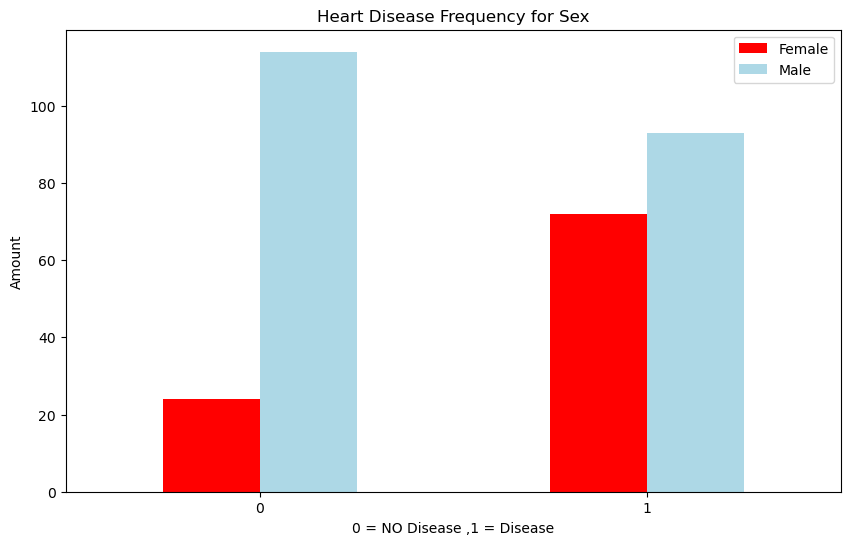

In [15]:
# create a plot of above crosstab

pd.crosstab(df.Target,df.Sex).plot(kind="bar",figsize=(10,6),color=("red","lightblue"));

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = NO Disease ,1 = Disease" )
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

**We Are trying to find patterns by comparing the independent variabels(age,thalach) and dependent variables (target).**

Since there are many values we are using scater to plot

## Age VS Max Heart Rate

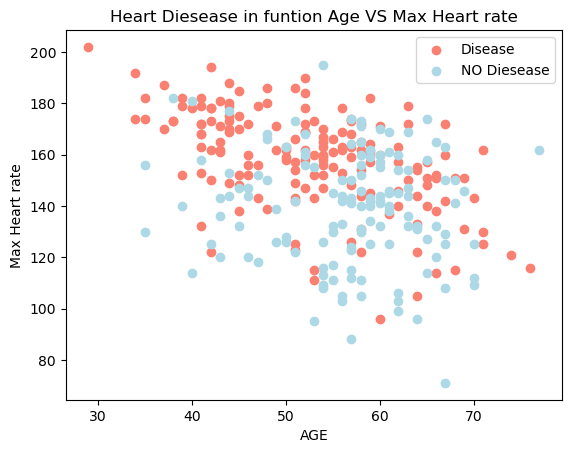

In [16]:
#All the positive examples
plt.scatter(df.age[df.Target==1],
           df.thalach[df.Target==1],
           color="salmon")

#All the negative examples
plt.scatter(df.age[df.Target==0],
           df.thalach[df.Target==0],
           color="lightblue");

#Add info
plt.title("Heart Diesease in funtion Age VS Max Heart rate")
plt.xlabel("AGE")
plt.ylabel("Max Heart rate")
plt.legend(["Disease","NO Diesease"]);

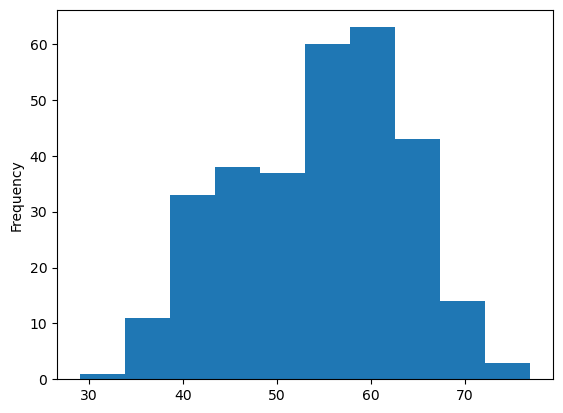

In [17]:
#check the distribution (spread) of the age column with a histogram
df.age.plot.hist();

## Correlation btw independent variables

compare all independent variables, this may give an idea of which independent variables may or may not have an impact on our target variables 

We can use df.corr() which will create a correlatoin matrix for us, a big table which shows us how related each variable is the other

In [18]:
# Find the correlation between our independent variables 
corr_matrix=df.corr()
corr_matrix

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Sex,Target
age,1.000000,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.098447,-0.225439
cp,-0.068653,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.049353,0.433798
trestbps,0.279570,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,-0.064347,-0.142035
chol,0.213465,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,-0.197387,-0.086563
fbs,0.121308,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.045032,-0.028046
restecg,-0.116211,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.058196,0.137230
thalach,-0.396302,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,-0.051491,0.413252
exang,0.096801,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,0.141664,-0.436757
oldpeak,0.210013,-0.149230,0.193827,0.053098,0.005747,-0.058770,-0.346806,0.288223,1.000000,-0.577537,0.222682,0.210244,0.096093,-0.430696
slope,-0.168814,0.119717,-0.121380,-0.003027,-0.059894,0.093045,0.380764,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,-0.030711,0.345877


(14.5, -0.5)

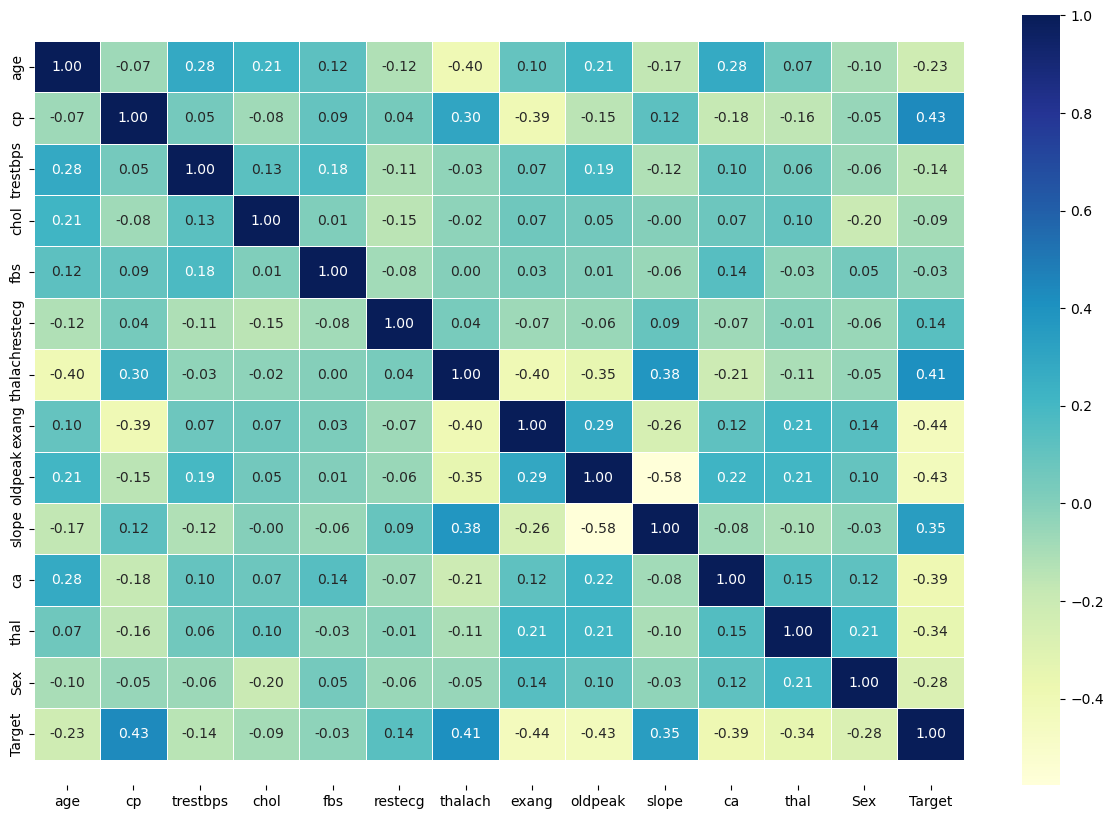

In [19]:
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt=".2f",
            cmap="YlGnBu");

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [20]:
sns.__version__

'0.13.2'

In [65]:
!pip install seaborn --upgrade

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [21]:
sns.__version__

'0.13.2'

above came across a problem where seaborn values were not shown .

**Solution** is to upgrade seaborn library (0.12-->0.13) (source stackoverflow)

# 5.Modelling

In [22]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Sex,Target
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,0,1
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,0,1


In [31]:
# split data into X and Y
X=df.drop("Target",axis=1)
Y=df["Target"]

#train test split

np.random.seed(42)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#usally next step is to make sure the data has no missing values and everythin is in numerical
#I completed the process in above cells itself

After splitting the data into train and test, We will now build Machine learning models.

We're are going to try 3 different ML models 
1. Logistic Regression
2. K-nearest neighbours
3. RandomForestClassification

In [32]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores
    

In [25]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
df.isna().sum() # Above we get the error beacuse we ave nan values 

age         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Sex         0
Target      0
dtype: int64

**Filling the empty values using Pandas method**


In [28]:
#Fill the make trestbpd columns
# I will fill the data with mean 
df["trestbps"].fillna(df["trestbps"].mean(),inplace=True)

# Fill chol coulmn
df["chol"].fillna(df["chol"].mean(),inplace=True)

#Fill thalach column
df["thalach"].fillna(df["thalach"].mean(),inplace=True)

In [29]:
df.isna().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Sex         0
Target      0
dtype: int64

In [30]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Sex,Target
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,0,1
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,0,1


**Now we dont have any nan values in our data**

In [33]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

C:\Users\lENOVO\ML-course\heart-disease-proj\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8524590163934426}

### Model comparision

We used 3 models to make predictions and now we use metrics to tell us about their performance.

Below is a comparsion plot between the 3 models 

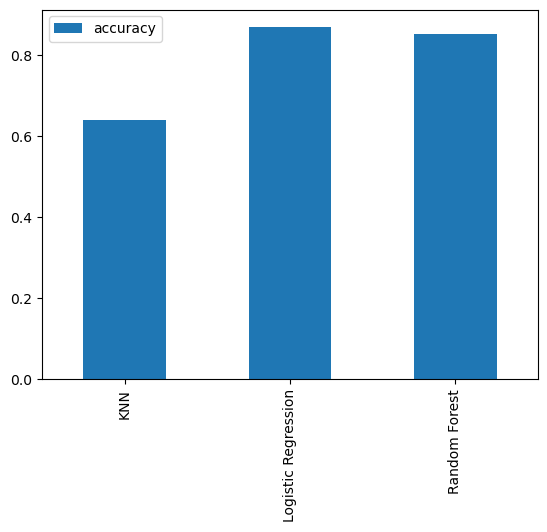

In [35]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
#default metric of classification models is accuracy
#model_scores is the dic with all the models metric scores

model_compare.T.plot.bar();

Alright, there were a few words in there which could sound made up to someone who's not a budding data scientist like yourself. But being the budding data scientist you are, you know data scientists make up words all the time.

Let's briefly go through each before we see them in acti.

.

Hyperparameter tu**ning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performa

n**ce.
Feature impor**tance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or

 **age?
Confusion **matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol 

l**ine).
Cross-val**dation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an a

v**erage.
P**recision - Proportion of true positives over total number of samples. Higher precision leads to less false po

s**itives**.
Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false n

e**gatives.**
F1 score - Combines precision and recall into one metric. 1 is best, 0

 **is worst.
Classifica**ion report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall an

d** f1-score**.
ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false po

s**itive rate.
Area Unde**r Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### click on the cell above to read it

## Hyperparameter tunning

In [38]:
# Lets do KNN 

#create a list of test and train scores
train_score=[]
test_score=[]

#Create a list with values for n_neighbours (these values will effect the model)
neighbors=range(1,21)

# set algorithm
knn=KNeighborsClassifier()

#Loop through different neighbors values 
for i in neighbors:
    knn.set_params(n_neighbors=i) # set neighbors value
    
    # Fit the model
    knn.fit(X_train,Y_train)

    #Update the traing scores
    train_score.append(knn.score(X_train,Y_train))

    #Updating test scores
    test_score.append(knn.score(X_test,Y_test))


#### plotting the test scores 

Maximum KNN score on the test data :72.13%


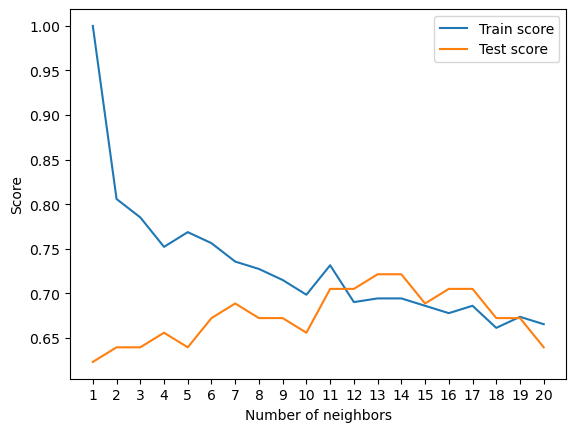

In [45]:
plt.plot(neighbors,train_score,label="Train score")
plt.plot(neighbors,test_score,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"Maximum KNN score on the test data :{max(test_score)*100:.2f}%");

## Hyoerparamet tuning with RandomizedSearch CV
Tuning Logistic Regression and Random FOrest Classi
using RandomizedSearchCV

In [60]:
#Different Logsitic Regression Hyperparameters
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

#Different RF hyperparameters
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we have hyperparameter grdis setup of out models , tune them usign RandomizedSearchCV


In [61]:
#tune logistic Regression
np.random.seed(42)

#setup random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#Fit random hyperparamet search model
rs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [50]:
rs_log_reg.score(X_test,Y_test)

0.8360655737704918

Our model performed poor with these parametrs


Now let us tune RandomForesstClassifier()

In [52]:
# tune randomforest 
np.random.seed(42)

#ssetup randomforest hyperparameter 
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [54]:
#evaluate the randomized search randomforestclassifirer
rs_rf.score(X_test,Y_test)

0.8360655737704918

### Using GridSearchCV

In [66]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [67]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
# Evaluate the model
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [55]:
model_scores

{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8524590163934426}

##Evaluating out tuned ML classifier, beyong accuracy
* ROC curve and AUC scor
* Confusion Matrix
* Classificatoin report
* Precission
* Reacall
* F1-score

  using cross validation


In [70]:
#Make predictions with tuned models
y_preds=gs_log_reg.predict(X_test)

In [71]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

#### ROC curve and AUC metric 

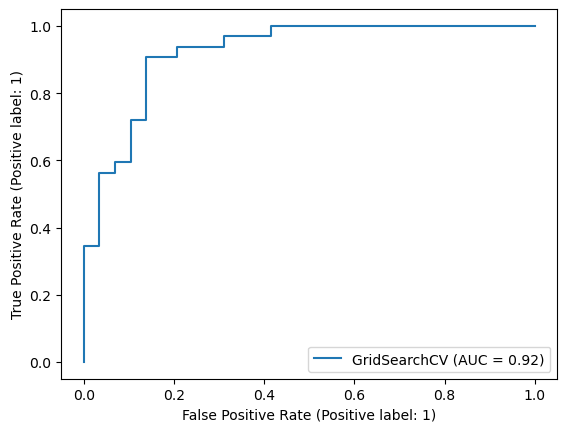

In [74]:
#Plot ROC curve and calculate and calculate  AUC score
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=Y_test);


#### Confusion Matrix

In [75]:
#Confusion Matrix 
#basic confusion matrix code
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


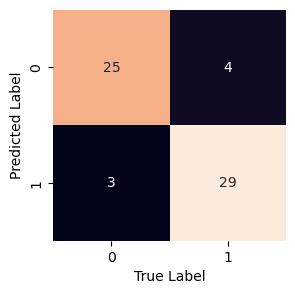

In [80]:
#Better visualization of Confusion Matrix
#creating a funtion to call again

def conf_matrix(Y_test,y_preds):

    fig,ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(Y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

conf_matrix(Y_test,y_preds)
    

#### Classification Report 

In [82]:
 print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics usign cross-validation

We will calculate precision,accuracy,recall,F1-score of our model using cross-validation and to do so we will using cross val score

With cross validation, it takes a estimator and checks the score or uses the metric we give (like accuracy,F1-score,recall) on the different data splits. cross validation divides the data into 5 or K no.of test,train splits and we apply the metrics on all of those division and find mean to find the avg score.


In [83]:
# CHeck the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [85]:
# create a classifier with the best parameters

clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [88]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.88333333, 0.75      ])

In [90]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8414207650273223

In [91]:
#C-V precision
cv_pre=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="precision")
cv_pre

array([0.775     , 0.86111111, 0.85714286, 0.86111111, 0.725     ])

In [92]:
cv_pre=np.mean(cv_pre)
cv_pre

0.8158730158730159

In [93]:
#C-V recall
cv_recall=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [96]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [97]:
#C-V f1
cv_f1=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="f1")
cv_f1

array([0.84931507, 0.89855072, 0.88235294, 0.89855072, 0.79452055])

In [98]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8646580013780378

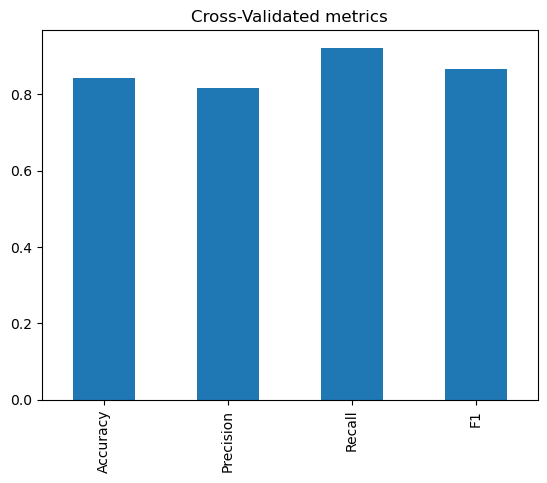

In [99]:
#Visualize cross-validated  metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_pre,
                        "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated metrics",legend=False);

#### Feature Importance

Feature importance is asking , which features contributed most to the outcomes of the model and did they contribute